In [1]:
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import randint, uniform
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv('playground-series-s4e11/train.csv')
data

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1,2.0,No,0
1,1,Vivan,Male,26,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7,3.0,No,1
2,2,Yuvraj,Male,33,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
3,3,Yuvraj,Male,22,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10,1.0,Yes,1
4,4,Rhea,Female,30,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2,4.0,Yes,1
140696,140696,Lata,Female,41,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6,5.0,Yes,0
140697,140697,Aanchal,Female,24,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4,4.0,No,0
140698,140698,Prachi,Female,49,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10,1.0,No,0


# data preprocessing

In [3]:
#work group
data_work = data[data['Working Professional or Student'] == 'Working Professional'].copy()
data_work = data_work.drop(columns=['id', 'Working Professional or Student', 'Academic Pressure', 'CGPA', 'Study Satisfaction']).reset_index(drop=True)
print(data_work.info())
data_work

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112799 entries, 0 to 112798
Data columns (total 15 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Name                                   112799 non-null  object 
 1   Gender                                 112799 non-null  object 
 2   Age                                    112799 non-null  int64  
 3   City                                   112799 non-null  object 
 4   Profession                             104036 non-null  object 
 5   Work Pressure                          112779 non-null  float64
 6   Job Satisfaction                       112782 non-null  float64
 7   Sleep Duration                         112799 non-null  object 
 8   Dietary Habits                         112797 non-null  object 
 9   Degree                                 112797 non-null  object 
 10  Have you ever had suicidal thoughts ?  112799 non-null  

,Name,Gender,Age,City,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Aaradhya,Female,49,Ludhiana,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,No,1,2.0,No,0
1,Vivan,Male,26,Varanasi,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7,3.0,No,1
2,Yuvraj,Male,22,Mumbai,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10,1.0,Yes,1
3,Rhea,Female,30,Kanpur,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9,4.0,Yes,0
4,Vani,Female,59,Ahmedabad,Finanancial Analyst,2.0,5.0,5-6 hours,Healthy,MCA,No,7,5.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112794,Ishaani,Female,45,Ahmedabad,Teacher,2.0,5.0,Less than 5 hours,Moderate,B.Ed,Yes,1,5.0,No,0
112795,Vidya,Female,18,Ahmedabad,NaN,5.0,4.0,5-6 hours,Unhealthy,Class 12,No,2,4.0,Yes,1
112796,Lata,Female,41,Hyderabad,Content Writer,5.0,4.0,7-8 hours,Moderate,B.Tech,Yes,6,5.0,Yes,0
112797,Aanchal,Female,24,Kolkata,Marketing Manager,3.0,1.0,More than 8 hours,Moderate,B.Com,No,4,4.0,No,0


In [4]:
#student group
data_student = data[data['Working Professional or Student'] == 'Student'].copy()
data_student = data_student.drop(columns=['id', 'Working Professional or Student', 'Profession', 'Work Pressure', 'Job Satisfaction']).reset_index(drop=True)
print(data_student.info())
data_student

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   27901 non-null  object 
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  int64  
 3   City                                   27901 non-null  object 
 4   Academic Pressure                      27892 non-null  float64
 5   CGPA                                   27892 non-null  float64
 6   Study Satisfaction                     27891 non-null  float64
 7   Sleep Duration                         27901 non-null  object 
 8   Dietary Habits                         27899 non-null  object 
 9   Degree                                 27901 non-null  object 
 10  Have you ever had suicidal thoughts ?  27901 non-null  object 
 11  Wo

,Name,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Yuvraj,Male,33,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
1,Aishwarya,Female,24,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3,2.0,Yes,0
2,Aditya,Male,31,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9,1.0,Yes,0
3,Prisha,Female,28,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4,5.0,Yes,1
4,Chhavi,Female,25,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Aaradhya,Female,27,Surat,5.0,5.75,5.0,5-6 hours,Unhealthy,Class 12,Yes,7,1.0,Yes,0
27897,Rohan,Male,27,Ludhiana,2.0,9.40,3.0,Less than 5 hours,Healthy,MSc,No,0,3.0,Yes,0
27898,Ayaan,Male,31,Faridabad,3.0,6.61,4.0,5-6 hours,Unhealthy,MD,No,12,2.0,No,0
27899,Rashi,Female,18,Ludhiana,5.0,6.88,2.0,Less than 5 hours,Healthy,Class 12,Yes,10,5.0,No,1


In [5]:
#drop nan value
data_work.dropna(axis=0, how='any', inplace=True)
data_student.dropna(axis=0, how='any', inplace=True)
print(data_work.info())
print(data_student.info())

<class 'pandas.core.frame.DataFrame'>
Index: 104032 entries, 0 to 112798
Data columns (total 15 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Name                                   104032 non-null  object 
 1   Gender                                 104032 non-null  object 
 2   Age                                    104032 non-null  int64  
 3   City                                   104032 non-null  object 
 4   Profession                             104032 non-null  object 
 5   Work Pressure                          104032 non-null  float64
 6   Job Satisfaction                       104032 non-null  float64
 7   Sleep Duration                         104032 non-null  object 
 8   Dietary Habits                         104032 non-null  object 
 9   Degree                                 104032 non-null  object 
 10  Have you ever had suicidal thoughts ?  104032 non-null  objec

In [6]:
#work group's encodeing
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
columns = ['Name', 'Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for column in columns:
    data_work[column] = label_encoder.fit_transform(data_work[column])
corr = data_work.corr()
corr

,Name,Gender,Age,City,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
Name,1.000000,0.006685,0.041587,-0.006954,0.014842,-0.012146,0.011287,0.007449,-0.019272,0.004263,0.003441,0.003629,0.002166,-0.000563,-0.012519
Gender,0.006685,1.000000,0.000596,-0.012905,0.009502,-0.001198,-0.008707,-0.005272,0.032800,0.010126,-0.015860,0.004734,-0.010306,-0.015602,0.006574
Age,0.041587,0.000596,1.000000,0.019046,-0.004472,-0.061764,0.029981,-0.019724,-0.034689,0.064842,-0.035209,-0.050417,-0.039770,0.001886,-0.384375
City,-0.006954,-0.012905,0.019046,1.000000,0.004350,-0.004519,0.005601,0.003257,0.010761,-0.013424,0.013665,0.000752,-0.009580,0.009091,-0.010173
Profession,0.014842,0.009502,-0.004472,0.004350,1.000000,-0.006428,-0.011889,-0.004221,0.017715,0.022287,-0.004757,0.003971,0.005568,0.000491,-0.005069
Work Pressure,-0.012146,-0.001198,-0.061764,-0.004519,-0.006428,1.000000,-0.032120,-0.001625,0.012993,0.025693,0.032835,-0.010025,0.014901,-0.008020,0.184749
Job Satisfaction,0.011287,-0.008707,0.029981,0.005601,-0.011889,-0.032120,1.000000,0.000257,-0.023708,0.010217,-0.044942,-0.023967,-0.022490,-0.011209,-0.158042
Sleep Duration,0.007449,-0.005272,-0.019724,0.003257,-0.004221,-0.001625,0.000257,1.000000,-0.007833,0.006936,0.003866,-0.009510,0.002349,0.000707,0.019427
Dietary Habits,-0.019272,0.032800,-0.034689,0.010761,0.017715,0.012993,-0.023708,-0.007833,1.000000,-0.009665,0.037150,0.015743,0.023691,0.001965,0.104877
Degree,0.004263,0.010126,0.064842,-0.013424,0.022287,0.025693,0.010217,0.006936,-0.009665,1.000000,0.002900,0.001290,0.000257,0.005848,-0.031661


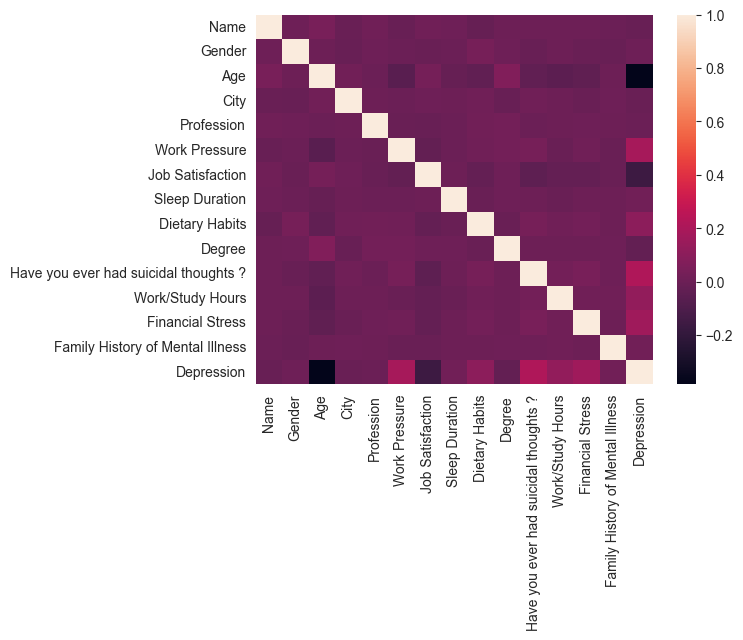

In [7]:
#heatmap
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(corr)
plt.show()

In [8]:
#student group's encodeing
columns_student = ['Name', 'Gender', 'City', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for column in columns_student:
    data_student[column] = label_encoder.fit_transform(data_student[column])
corr = data_student.corr()
corr

,Name,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
Name,1.000000,-0.003458,-0.017739,0.006167,0.010951,0.002457,-0.009361,0.019098,-0.014175,-0.006646,0.007225,-0.002898,0.008608,-0.001347,0.013543
Gender,-0.003458,1.000000,0.008789,-0.022105,-0.022283,0.036289,-0.016013,0.012409,0.050343,0.016079,-0.001426,0.012992,-0.005627,-0.015953,0.001829
Age,-0.017739,0.008789,1.000000,0.047003,-0.076165,0.004966,0.008981,-0.011938,-0.047868,0.080106,-0.113581,-0.032985,-0.095233,-0.004934,-0.226559
City,0.006167,-0.022105,0.047003,1.000000,-0.021025,-0.029047,0.006672,-0.009164,-0.005679,-0.005614,-0.005281,-0.002961,-0.004146,0.004230,-0.024723
Academic Pressure,0.010951,-0.022283,-0.076165,-0.021025,1.000000,-0.025155,-0.112137,-0.004686,0.079854,-0.006905,0.261686,0.095960,0.152009,0.030132,0.475008
CGPA,0.002457,0.036289,0.004966,-0.029047,-0.025155,1.000000,-0.047095,-0.019865,0.002538,-0.020796,0.008598,0.002604,0.006304,-0.004406,0.021812
Study Satisfaction,-0.009361,-0.016013,0.008981,0.006672,-0.112137,-0.047095,1.000000,0.002822,-0.023804,0.008537,-0.083509,-0.036956,-0.064932,-0.003963,-0.168137
Sleep Duration,0.019098,0.012409,-0.011938,-0.009164,-0.004686,-0.019865,0.002822,1.000000,0.013672,0.002191,-0.016199,-0.036178,0.000135,-0.000079,-0.016193
Dietary Habits,-0.014175,0.050343,-0.047868,-0.005679,0.079854,0.002538,-0.023804,0.013672,1.000000,-0.020534,0.105632,0.027585,0.075820,0.002962,0.191794
Degree,-0.006646,0.016079,0.080106,-0.005614,-0.006905,-0.020796,0.008537,0.002191,-0.020534,1.000000,-0.001112,-0.005407,-0.000376,0.011909,-0.013847


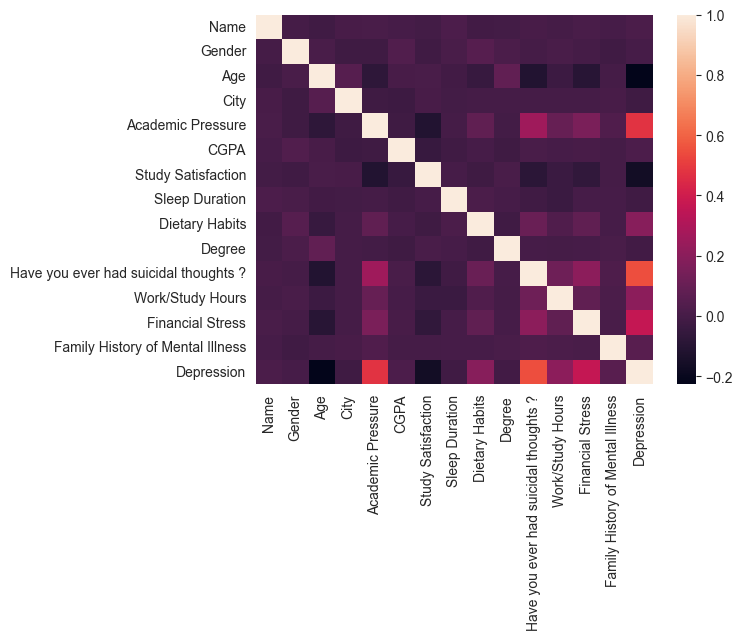

In [9]:
#heatmap
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(corr)
plt.show()

# modeling
## randomforest

In [34]:
# randomforest model for work group
X_work = data_work.drop(columns=['Depression'])
Y_work = data_work['Depression']

param_dist_work = {
    'n_estimators': randint(320,330),
    'max_depth': randint(25,27),
    'min_samples_split': randint(2,4),
    'min_samples_leaf': randint(2,3),
}

random_search_work = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=param_dist_work, n_iter=30, cv=5,scoring='accuracy', random_state=42,n_jobs=-1)


X_work_train,X_work_test, Y_work_train, Y_work_test= train_test_split(X_work, Y_work, test_size=0.2, random_state=0)

random_search_work.fit(X_work_train, Y_work_train)

print(random_search_work.best_params_)
print(random_search_work.best_score_)
best_rf_model_work = random_search_work.best_estimator_


{'max_depth': 25, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 326}
0.9675337939321118


In [35]:
X_student = data_student.drop(columns=['Depression'])
Y_student = data_student['Depression']


In [44]:
# randomforest model for student group


param_dist_student = {
    'n_estimators': randint(200,240),
    'max_depth': randint(11,14),
    'min_samples_split': randint(6,8),
    'min_samples_leaf': randint(1,5),
}

random_search_student = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=param_dist_student, n_iter=100, cv=5,scoring='accuracy', random_state=42,n_jobs=-1)

X_student_train, X_student_test, Y_student_train, Y_student_test = train_test_split(X_student, Y_student, test_size=0.2, random_state=0)

random_search_student.fit(X_student_train, Y_student_train)

print(random_search_student.best_params_)
print(random_search_student.best_score_)
best_rf_model_student = random_search_student.best_estimator_

{'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 200}
0.8470298139430621


In [45]:
#test data
data_predict = pd.read_csv('playground-series-s4e11/test.csv')
data_predict

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,Zoya,Female,49.0,Jaipur,Working Professional,Pilot,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes
93796,234496,Shlok,Male,29.0,Ahmedabad,Working Professional,Pilot,NaN,5.0,NaN,NaN,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes
93797,234497,Rishi,Male,24.0,Visakhapatnam,Student,NaN,1.0,NaN,7.51,4.0,NaN,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No
93798,234498,Eshita,Female,23.0,Kalyan,Working Professional,Marketing Manager,NaN,4.0,NaN,NaN,2.0,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes


In [46]:
#work group of test data
data_predict_work = data_predict[data_predict['Working Professional or Student'] == 'Working Professional'].copy()
id_work = data_predict_work['id']
data_predict_work = data_predict_work.drop(
    columns=['id', 'Working Professional or Student', 'Academic Pressure', 'CGPA', 'Study Satisfaction']).reset_index(
    drop=True)
data_predict_work

,Name,Gender,Age,City,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,Shivam,Male,53.0,Visakhapatnam,Judge,2.0,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,Sanya,Female,58.0,Kolkata,Educational Consultant,2.0,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,Yash,Male,53.0,Jaipur,Teacher,4.0,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,Shaurya,Male,47.0,Kalyan,Teacher,5.0,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No
4,Kartik,Male,29.0,Mumbai,Customer Support,2.0,3.0,More than 8 hours,Moderate,B.Com,No,3.0,2.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75023,Advait,Male,23.0,Delhi,Consultant,2.0,3.0,Less than 5 hours,Moderate,B.Com,Yes,12.0,4.0,No
75024,Zoya,Female,49.0,Jaipur,Pilot,3.0,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes
75025,Shlok,Male,29.0,Ahmedabad,Pilot,5.0,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes
75026,Eshita,Female,23.0,Kalyan,Marketing Manager,4.0,2.0,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes


In [47]:
#student group of test data
data_predict_student = data_predict[data_predict['Working Professional or Student'] == 'Student'].copy()
id_student = data_predict_student['id']
data_predict_student = data_predict_student.drop(columns=['id', 'Working Professional or Student', 'Profession', 'Work Pressure', 'Job Satisfaction']).reset_index(drop=True)
data_predict_student

,Name,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,Nalini,Female,23.0,Rajkot,5.0,6.84,1.0,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
1,Navya,Female,21.0,Surat,1.0,7.39,3.0,Less than 5 hours,Healthy,BBA,No,8.0,1.0,Yes
2,Kiran,Male,28.0,Lucknow,5.0,6.03,3.0,7-8 hours,Moderate,MA,No,11.0,3.0,Yes
3,Rashi,Female,26.0,Ghaziabad,3.0,8.63,5.0,More than 8 hours,Moderate,BBA,Yes,10.0,4.0,Yes
4,Manan,Male,32.0,Visakhapatnam,3.0,8.61,1.0,Less than 5 hours,Moderate,M.Ed,Yes,11.0,5.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18767,Ishaan,Male,33.0,Agra,5.0,5.74,2.0,7-8 hours,Moderate,B.Com,Yes,12.0,5.0,Yes
18768,Abhishek,Male,19.0,Nashik,4.0,8.96,3.0,7-8 hours,Unhealthy,Class 12,No,2.0,2.0,Yes
18769,Aohi,Female,29.0,Vadodara,2.0,5.58,5.0,More than 8 hours,Healthy,Class 12,Yes,8.0,2.0,Yes
18770,Shlok,Male,33.0,Nashik,1.0,7.92,2.0,More than 8 hours,Healthy,BA,Yes,9.0,2.0,No


In [48]:
#predict student group
columns_student = ['Name', 'Gender', 'City', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for column in columns_student:
    data_predict_student[column] = label_encoder.fit_transform(data_predict_student[column])
student_predict = best_rf_model_student.predict(data_predict_student)
pd.DataFrame(student_predict)

,0
0,1
1,0
2,1
3,1
4,1
...,...
18767,1
18768,0
18769,0
18770,0


In [49]:
#predict work group
columns = ['Name', 'Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for column in columns:
    data_predict_work[column] = label_encoder.fit_transform(data_predict_work[column])
work_predict = best_rf_model_work.predict(data_predict_work)
pd.DataFrame(work_predict)

,0
0,0
1,0
2,0
3,0
4,0
...,...
75023,0
75024,0
75025,1
75026,1


In [50]:
outcome_work = pd.DataFrame({
    'id': id_work,
    'Depression': work_predict
})

outcome_student = pd.DataFrame({
    'id': id_student,
    'Depression': student_predict
})


In [51]:
outcome = pd.concat([outcome_work, outcome_student], axis=0)
outcome = outcome.sort_values(by='id')
outcome

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
...,...,...
93795,234495,0
93796,234496,1
93797,234497,0
93798,234498,1


In [52]:
outcome.to_csv('outcome_RF.csv', index=False)

## GradientBoosting

In [160]:
# gradient boosting model
param_grid_work = {
    'n_estimators': randint(380,450),
    'learning_rate': [0.2, 0.3],
    'max_depth': randint(1,3),
    'min_samples_split': randint(4,6),
    'min_samples_leaf': randint(3,6)
}
random_search_work = RandomizedSearchCV(estimator=GradientBoostingClassifier(), param_distributions=param_grid_work, n_iter=20, cv=5,scoring='accuracy', random_state=42,n_jobs=-1)

random_search_work.fit(X_work_train, Y_work_train)
print(random_search_work.best_params_)
print(random_search_work.best_score_)
best_gb_model_work = random_search_work.best_estimator_

{'learning_rate': 0.2, 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 441}
0.9698407930309403


In [152]:
param_grid_student = {
    'n_estimators': randint(270,330),
    'learning_rate': [0.1, 0.2, 0.3, 0.4],
    'max_depth': randint(2,4),
    'min_samples_split': randint(5,7),
    'min_samples_leaf': randint(1,4)
}
random_search_student = RandomizedSearchCV(estimator=GradientBoostingClassifier(), param_distributions=param_grid_work, n_iter=50, cv=5,scoring='accuracy', random_state=0,n_jobs=-1)

random_search_student.fit(X_student_train, Y_student_train)
print(random_search_student.best_params_)
print(random_search_student.best_score_)
best_gb_model_student = random_search_student.best_estimator_

{'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 295}
0.8497197937682135


# Data Preprocessing

In [161]:
data_predict_student.isna().sum()

Name                                     0
Gender                                   0
Age                                      0
City                                     0
Academic Pressure                        7
CGPA                                     9
Study Satisfaction                       8
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
dtype: int64

In [162]:
imputer = SimpleImputer(strategy='mean')
data_predict_student_inputed = imputer.fit_transform(data_predict_student)
data_predict_work_inputed = imputer.fit_transform(data_predict_work)
# columns = ['Academic Pressure', 'CGPA', 'Study Satisfaction']
# for column in columns:
#     data_predict_student[column].fillna(data_predict_student[column].mean(), inplace=True)
data_predict_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18772 entries, 0 to 18771
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   18772 non-null  int64  
 1   Gender                                 18772 non-null  int64  
 2   Age                                    18772 non-null  float64
 3   City                                   18772 non-null  int64  
 4   Academic Pressure                      18765 non-null  float64
 5   CGPA                                   18763 non-null  float64
 6   Study Satisfaction                     18764 non-null  float64
 7   Sleep Duration                         18772 non-null  int64  
 8   Dietary Habits                         18772 non-null  int64  
 9   Degree                                 18772 non-null  int64  
 10  Have you ever had suicidal thoughts ?  18772 non-null  int64  
 11  Wo

## Prediction

In [163]:
#predict student group
student_predict = best_gb_model_student.predict(data_predict_student_inputed)
#predict work group
work_predict = best_gb_model_work.predict(data_predict_work_inputed)

C:\Users\jiang\Project_py\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\jiang\Project_py\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [164]:
outcome_work = pd.DataFrame({
    'id': id_work,
    'Depression': work_predict
})

outcome_student = pd.DataFrame({
    'id': id_student,
    'Depression': student_predict
})
outcome = pd.concat([outcome_work, outcome_student], axis=0)
outcome = outcome.sort_values(by='id')
outcome

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
...,...,...
93795,234495,0
93796,234496,1
93797,234497,0
93798,234498,1


In [165]:
outcome.to_csv('outcome_GB.csv', index=False)